In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [113]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()
t = titles

In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()
c = cast

### What are the ten most common movie names of all time?

In [96]:
#t.groupby(['title']).size().sort_values('title', reverse = True)
#t['title'].size()
t.groupby(['title']).size().sort_values(axis=0, ascending=False).head(10)

title
Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    12
Othello                 11
Temptation              11
Freedom                 11
Kismet                  11
The Three Musketeers    11
dtype: int64

### Which three years of the 1930s saw the most films released?

In [143]:
t = titles
t['decade'] = t.year // 10 * 10
top3 = t[t.decade == 1930]
top3.groupby(['year']).size().sort_values().tail(3)

year
1938    1130
1936    1139
1937    1197
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

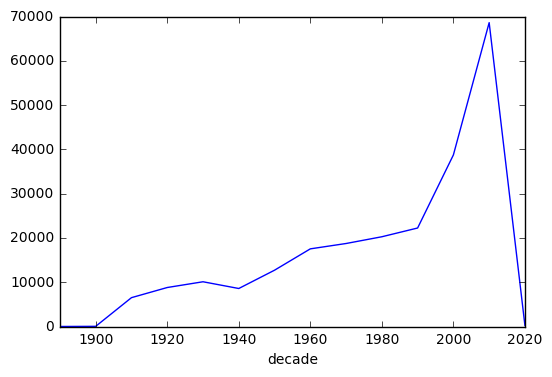

In [165]:
t.groupby(['decade']).size().sort_index().plot(x = 'decade', y = 'size')

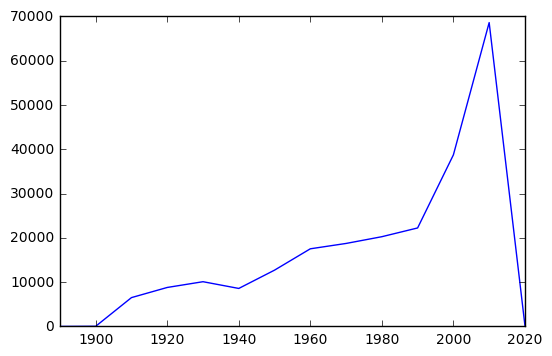

In [151]:
t.decade.value_counts().sort_index().plot()

### Plot the number of "Hamlet" films made each decade.

In [189]:
Hamlet = t[t.title == 'Hamlet']
Hamlet.groupby('decade').size()

decade
1910    3
1920    1
1940    1
1950    1
1960    2
1970    2
1980    1
1990    2
2000    2
2010    3
dtype: int64

### Plot the number of "Rustler" characters in each decade of the history of film.

### Plot the number of "Hamlet" characters each decade.

### What are the 11 most common character names in movie history?

### Who are the 10 people most often credited as "Herself" in film history?

### Who are the 10 people most often credited as "Himself" in film history?

### Which actors or actresses appeared in the most movies in the year 1945?

### Which actors or actresses appeared in the most movies in the year 1985?

### Plot how many roles Mammootty has played in each year of his career.

### What are the 10 most frequent roles that start with the phrase "Patron in"?

### What are the 10 most frequent roles that start with the word "Science"?

### Plot the n-values of the roles that Judi Dench has played over her career.

### Plot the n-values of Cary Grant's roles through his career.

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

# Examples by Brandon Rhodes

In [7]:
import hashlib
with open ('data/titles.csv', 'rb') as f:
    print(hashlib.md5(f.read()).hexdigest())

52377068c34818c62ee3ed0928de3c73


In [12]:
%%time
cast[cast.title == 'Sleuth']

Wall time: 216 ms


,title,year,name,type,character,n
252564,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
317511,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
317512,Sleuth,2007,Michael Caine,actor,Andrew,1.0
363543,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
363544,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1257779,Sleuth,2007,Jude Law,actor,Milo,2.0
1408727,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1424988,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1658540,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1756261,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [18]:
c = cast.set_index(['title', 'year']).sort_index()
c.head()

name   type               character     n
title            year                                                        
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17.0
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21.0
                 2013  Zachary (X) Brown  actor  Africian American Teen  18.0
                 2013     Yvis Cannavale  actor            Homeless Man  25.0
                 2013      Patrick Chien  actor          Cleaver Victim  22.0

In [24]:
%%time
c.loc['Sleuth']

Wall time: 500 µs


,name,type,character,n
year,,,,
1972,Michael Caine,actor,Milo Tindle,2.0
1972,Alec Cawthorne,actor,Inspector Doppler,3.0
1972,Teddy Martin,actor,Police Constable Higgs,6.0
1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1972,Laurence Olivier,actor,Andrew Wyke,1.0
1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
2007,Michael Caine,actor,Andrew,1.0
2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN


In [27]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['title', 'year', 'character']).size()

title                               year  character               
A Very Murray Christmas             2015  George Clooney              1
Batman & Robin                      1997  Batman                      1
                                          Bruce Wayne                 1
Burn After Reading                  2008  Harry Pfarrer               1
Confessions of a Dangerous Mind     2002  Jim Byrd                    1
Curdled                             1996  Seth Gecko                  1
Fantastic Mr. Fox                   2009  Mr. Fox                     1
From Dusk Till Dawn                 1996  Seth Gecko                  1
Good Night, and Good Luck.          2005  Fred Friendly               1
Gravity                             2013  Matt Kowalski               1
Grizzly II: The Concert             1983  Ron                         1
Hail, Caesar!                       2016  Baird Whitlock              1
Intolerable Cruelty                 2003  Miles                      

In [28]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['title', 'year']).size()

title                               year
A Very Murray Christmas             2015    1
Batman & Robin                      1997    2
Burn After Reading                  2008    1
Confessions of a Dangerous Mind     2002    1
Curdled                             1996    1
Fantastic Mr. Fox                   2009    1
From Dusk Till Dawn                 1996    1
Good Night, and Good Luck.          2005    1
Gravity                             2013    1
Grizzly II: The Concert             1983    1
Hail, Caesar!                       2016    1
Intolerable Cruelty                 2003    1
Leatherheads                        2008    1
Michael Clayton                     2007    1
Money Monster                       2016    1
Morning Glory                       2010    1
O Brother, Where Art Thou?          2000    1
Ocean's Eleven                      2001    1
Ocean's Thirteen                    2007    1
Ocean's Twelve                      2004    1
One Fine Day                        199

In [30]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['year']).size()

year
1983    1
1987    1
1988    1
1992    2
1996    3
1997    3
1998    2
1999    4
2000    2
2001    2
2002    3
2003    2
2004    1
2005    2
2006    1
2007    2
2008    2
2009    3
2010    3
2011    2
2013    1
2014    1
2015    2
2016    2
dtype: int64

In [43]:
c = cast
c = c[c.name == 'George Clooney']
#c.groupby(['year']).n.size()
c.groupby(c.year // 10 * 10).n.size() # Create a decade for groupby

year
1980     3
1990    14
2000    20
2010    11
dtype: int64

In [191]:
c = cast
c.groupby([c.year // 10 * 10, 'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       27111
      actress     15499
1920  actor       47923
      actress     23604
1930  actor      150007
      actress     49157
1940  actor      160888
      actress     51085
1950  actor      155338
      actress     56507
1960  actor      131212
      actress     56096
1970  actor      150248
      actress     65147
1980  actor      194113
      actress     89434
1990  actor      259400
      actress    122628
2000  actor      485809
      actress    261289
2010  actor      699286
      actress    392117
2020  actor         177
      actress        90
dtype: int64

In [200]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]

g = c.groupby(['character', c.year // 10 * 10]).size()

In [209]:
u = g.unstack(0).fillna(0) # u = g.unstack(0).fillna('')
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,0.0
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,0.0


In [210]:
u.stack()

year  character       
1970  Kermit the Frog     1.0
      Oscar the Grouch    0.0
1980  Kermit the Frog     4.0
      Oscar the Grouch    2.0
1990  Kermit the Frog     2.0
      Oscar the Grouch    1.0
2000  Kermit the Frog     1.0
      Oscar the Grouch    1.0
2010  Kermit the Frog     1.0
      Oscar the Grouch    0.0
dtype: float64

In [211]:
u['Kermit the Frog'] - u['Oscar the Grouch']

year
1970    1.0
1980    2.0
1990    1.0
2000    0.0
2010    1.0
dtype: float64

In [213]:
df = g.unstack('character')
df['extra'] = 1 # the index needs to be replaced in order to unstack twice
df = df.set_index('extra', drop=True, append=True)
df.unstack(0)

character Kermit the Frog                     Oscar the Grouch                 \
year                 1970 1980 1990 2000 2010             1970 1980 1990 2000   
extra                                                                           
1                     1.0  4.0  2.0  1.0  1.0              NaN  2.0  1.0  1.0   

character       
year      2010  
extra           
1          NaN